In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import os

In [257]:
datasets_dir = os.path.join(os.getcwd(), 'datasets')
files = os.listdir(datasets_dir)
for file in files:
    if file.endswith('.csv'):  
        file_path = os.path.join(datasets_dir, file)
        df = pd.read_csv(file_path)
        print(f"Data from {file}:")
        print(df.head()) 

Data from UNH_2006-01-01_to_2018-01-01.csv:
         Date   Open   High    Low  Close   Volume Name
0  2006-01-03  62.60  62.60  60.60  61.73  8070600  UNH
1  2006-01-04  61.89  62.20  61.60  61.88  5587100  UNH
2  2006-01-05  62.23  62.88  61.49  61.69  5626000  UNH
3  2006-01-06  62.75  62.93  62.03  62.90  5577800  UNH
4  2006-01-09  62.90  62.90  61.26  61.40  8831000  UNH
Data from GE_2006-01-01_to_2018-01-01.csv:
         Date   Open   High    Low  Close    Volume Name
0  2006-01-03  35.10  35.40  34.80  35.37  33221400   GE
1  2006-01-04  35.35  35.40  35.10  35.32  24017300   GE
2  2006-01-05  35.27  35.35  35.10  35.23  18860400   GE
3  2006-01-06  35.38  35.53  35.19  35.47  22085300   GE
4  2006-01-09  35.40  35.43  35.24  35.38  20716900   GE
Data from TRV_2006-01-01_to_2018-01-01.csv:
         Date   Open   High    Low  Close   Volume Name
0  2006-01-03  44.85  46.00  44.52  45.99  3843800  TRV
1  2006-01-04  45.99  46.61  45.85  46.50  2285900  TRV
2  2006-01-05  46.79  4

In [258]:
datasets_dir = os.path.join(os.getcwd(), 'datasets')
file_name = 'JPM_2006-01-01_to_2018-01-01.csv'  # Replace with your file name
file_path = os.path.join(datasets_dir, file_name)
df = pd.read_csv(file_path)

In [259]:
df['High']

0        40.36
1        40.14
2        39.81
3        40.24
4        40.72
         ...  
3015    108.46
3016    107.99
3017    107.29
3018    107.84
3019    108.28
Name: High, Length: 3020, dtype: float64

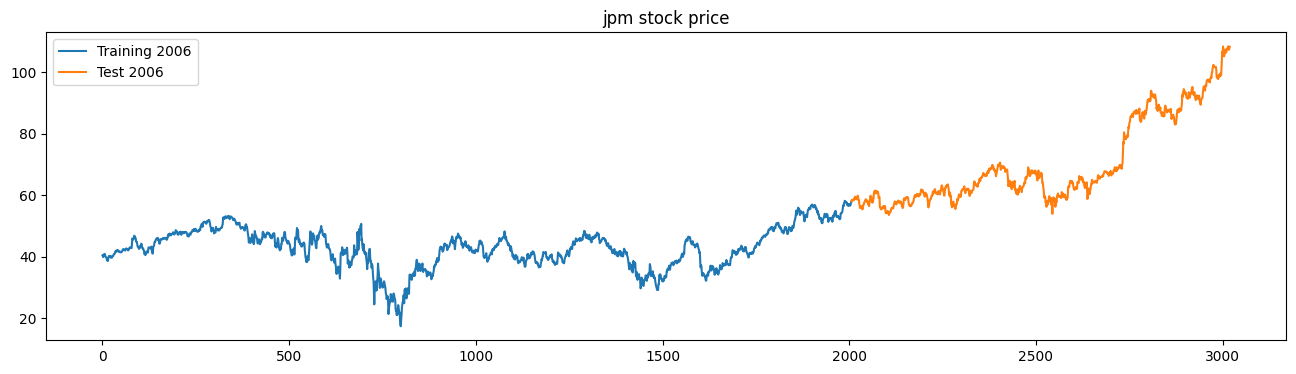

In [260]:
df['High'].loc[:'2006'].plot(figsize=(16,4),)
df['High'].loc['2006':].plot(figsize=(16,4),)
plt.legend(['Training 2006', 'Test 2006'])
plt.title('jpm stock price')
plt.show()

In [261]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [262]:
train_data= df[:'2006']['High'].values
test_data= df['2006':]['High'].values

In [263]:
train_data.shape

(251,)

In [264]:
size = 60

In [265]:
def split(dataset, size):
    X, y = [], []
    for i in range(len(dataset) - size):
        X.append(dataset[i:i + size])
        y.append(dataset[i + size])
    return np.array(X), np.array(y)

In [266]:
X_train, y_train= split(train_data, 60)
X_test, y_test= split(test_data, 60)

In [267]:
X_train[0]

array([40.36, 40.14, 39.81, 40.24, 40.72, 40.75, 40.87, 40.42, 40.03,
       39.82, 39.71, 39.47, 38.82, 38.7 , 38.53, 38.68, 39.81, 40.04,
       39.97, 40.19, 40.22, 40.16, 40.1 , 39.6 , 39.6 , 39.62, 40.03,
       39.98, 40.31, 40.33, 40.5 , 40.82, 40.82, 40.95, 41.55, 41.57,
       41.83, 41.95, 41.6 , 41.94, 41.84, 42.09, 41.81, 41.66, 41.74,
       41.74, 41.4 , 41.48, 41.5 , 41.34, 41.53, 41.5 , 41.55, 41.71,
       42.2 , 42.2 , 42.43, 42.2 , 42.21, 42.08])

In [268]:
scalerX = StandardScaler()
scalery= StandardScaler()

X_train = scalerX.fit_transform(X_train)
X_test= scalerX.transform(X_test)

y_train= scalery.fit_transform(np.array(y_train).reshape(-1,1)).flatten()
y_test= scalery.transform(np.array(y_test).reshape(-1,1)).flatten()

In [269]:
X_train[0]
y_test[:5]

array([-1.41032435, -1.45306349, -1.23081998, -1.23081998, -1.14534171])

In [270]:
n_features = 1
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],n_features)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],n_features)

In [271]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [272]:
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

val_dataset = TensorDataset(X_test, y_test)
val_loader = DataLoader(val_dataset, batch_size=8)

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, size, n_features):
        super(LSTMModel, self).__init__()
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        last_out = lstm_out[:, -1, :]
        return self.fc(last_out)

input_size = 1
hidden_size = 50
num_layers = 1
output_size = 1

model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(x_batch)
        loss = criterion(output, y_batch.unsqueeze(-1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * x_batch.size(0)
    train_loss /= len(train_loader.dataset)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in val_loader:
            output = model(x_batch)
            loss = criterion(output, y_batch.unsqueeze(-1))
            val_loss += loss.item() * x_batch.size(0)
    val_loss /= len(val_loader.dataset)


In [280]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = y_pred.numpy()
y_pred = scalery.inverse_transform(y_pred.reshape(-1, 1)).flatten()

y_test_actual = scalery.inverse_transform(y_test.numpy().reshape(-1, 1)).flatten()


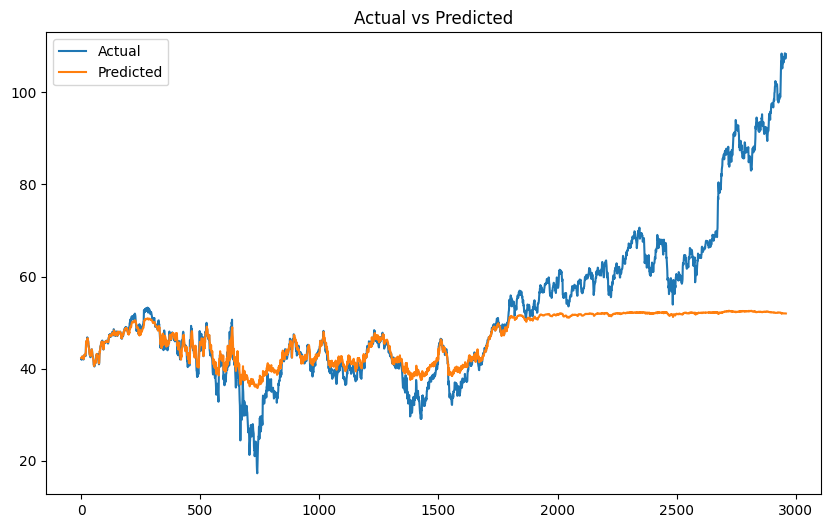

In [282]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted")
plt.show()

In [284]:
mse = mean_squared_error(y_test_actual, y_pred)
print(f"Mean Squared Error: {mse:.1f}")

Mean Squared Error: 188.8
